# Microsoft Word Automation Sample
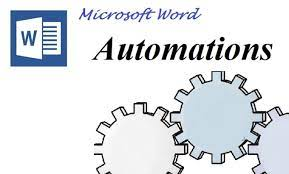

# Importing Libraries

In [1]:
import pandas as pd
from datetime import datetime

!pip install docxtpl
from docxtpl import DocxTemplate

# Importing Data

In [37]:
df = pd.read_excel('orders.xlsx', sheet_name='Sheet1')
df

,date,inv_no,company,com_address,com_phone,com_fax,com_email,name,address,city,...,quantity1,desc1,quantity2,desc2,quantity3,desc3,quantity4,desc4,quantity5,desc5
0,2022-10-17,4170,XYZ Furniture,"6000 W Markham St #2188, Little Rock, AR 72205",123-456-7891,456-789-1234,info@xyzfurn.com,James Butt,6649 N Blue Gum St,New Orleans,...,1,2158 Std Chalk Grey Server,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-17,4171,ABC Furniture,"3901 S University Ave #25, Little Rock, AR 72204",987-654-3219,456-789-1235,info@abcfurn.com,Josephine Darakjy,4 B Blue Ridge Blvd,Brighton,...,1,Moco Tan Modular Sectional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-10-17,4172,XYZ Furniture,"6000 W Markham St #2188, Little Rock, AR 72205",123-456-7891,456-789-1236,info@xyzfurn.com,Art Venere,8 W Cerritos Ave #54,Bridgeport,...,2,Whoops Sands 5-Piece Dining Set,1.0,Dufo White Sands Bench,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-10-17,4173,XYZ Furniture,"6000 W Markham St #2188, Little Rock, AR 72205",123-456-7891,456-789-1237,info@xyzfurn.com,Lenna Paprocki,639 Main St,Anchorage,...,1,Len Mustard Velvet Double Chaise Sectional,1.0,Len Upholstered Accent Chair Rose,1.0,Chea Coffee Table,NaN,NaN,NaN,NaN
4,2022-10-17,4174,ABC Furniture,"3901 S University Ave #25, Little Rock, AR 72204",987-654-3219,456-789-1238,info@abcfurn.com,Donette Foller,34 Center St,Hamilton,...,3,Ufo Mirrored Console Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-10-17,4175,XYZ Furniture,"6000 W Markham St #2188, Little Rock, AR 72205",123-456-7891,456-789-1239,info@xyzfurn.com,Simona Morasca,3 Mcauley Dr,Ashland,...,1,Sasu Black Queen Bed Frame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-10-17,4176,ABC Furniture,"3901 S University Ave #25, Little Rock, AR 72204",987-654-3219,456-789-1240,info@abcfurn.com,Mitsue Tollner,7 Eads St,Chicago,...,1,Kulu White Sands Bench,1.0,Whoops Sands 5-Piece Dining Set,1.0,Len Mustard Velvet Double Chaise Sectional,1.0,Way 3-Piece Dinette,NaN,NaN
7,2022-10-18,4177,ABC Furniture,"3901 S University Ave #25, Little Rock, AR 72204",987-654-3219,456-789-1241,info@abcfurn.com,Leota Dilliard,7 W Jackson Blvd,San Jose,...,1,Chea Coffee Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-10-18,4178,XYZ Furniture,"6000 W Markham St #2188, Little Rock, AR 72205",123-456-7891,456-789-1242,info@xyzfurn.com,Sage Wieser,5 Boston Ave #88,Sioux Falls,...,1,Len Upholstered Accent Chair Rose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-10-18,4179,XYZ Furniture,"6000 W Markham St #2188, Little Rock, AR 72205",123-456-7891,456-789-1243,info@xyzfurn.com,Kris Marrier,228 Runamuck Pl #2808,Baltimore,...,2,Dufo White Sands Bench,1.0,Ufo Mirrored Console Table,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.shape

(10, 23)

In [39]:
df = df.fillna("######") #Let's fill in the nan values

Suppose today is October 18, 2022, and we will create the packing slips for the last 2 days.

In [40]:
current_day = datetime.today().strftime("%d %b, %Y")
current_day

'18 Oct, 2022'

In [41]:
current_day_dict = {'current_day': current_day}

# Generating MS Word Template

Let's generate an MS Word template first in order to create as many MS Word documents as we want.

In [2]:
doc = DocxTemplate("invoice.docx")

# Creating Automated MS Word Documents

In [31]:
for index, row in df.iterrows():
    context = {'date': row['date'],
               'inv_no': row['inv_no'],
               'company': row['company'],
               'com_address': row['com_address'],
               'com_phone': row['com_phone'],
               'com_fax': row['com_fax'],
               'com_email': row['com_email'],
               'name': row['name'],
               'address': row['address'],
               'city': row['city'],
               'zip': row['zip'],
               'phone': row['phone'],
               'e_mail': row['e_mail'],
              'quantity1': row['quantity1'],
              'quantity2': row['quantity2'],
              'quantity3': row['quantity3'],
              'quantity4': row['quantity4'],
              'quantity5': row['quantity5'],
              'desc1': row['desc1'],
              'desc2': row['desc2'],
              'desc3': row['desc3'],
              'desc4': row['desc4'],
              'desc5': row['desc5']                       
              }
    
    context.update(current_day_dict) # Let's merge this dictionary with the first dictionary.
    
    doc.render(context)
    doc.save(f"{context['inv_no']}_invoice.docx") # Let the file name be the invoice number

***Thanks for reading. I hope you enjoy it and that it was helpful to you.***

***Please don't forget to follow and vote for me on
[Kaggle](https://www.kaggle.com/drindeng) | [GitHub](https://github.com/drindeng) | [Linkedin](https://www.linkedin.com/in/turgay-turker/) ✌️***